<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Data-download" data-toc-modified-id="Data-download-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data download</a></span><ul class="toc-item"><li><span><a href="#Community" data-toc-modified-id="Community-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Community</a></span></li><li><span><a href="#Genome-metadata" data-toc-modified-id="Genome-metadata-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Genome metadata</a></span></li><li><span><a href="#Functional-data" data-toc-modified-id="Functional-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Functional data</a></span></li></ul></li><li><span><a href="#Load" data-toc-modified-id="Load-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metagenome-samples" data-toc-modified-id="Metagenome-samples-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Metagenome samples</a></span></li><li><span><a href="#Genome-metadata" data-toc-modified-id="Genome-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Genome metadata</a></span></li><li><span><a href="#Functional-data" data-toc-modified-id="Functional-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Functional data</a></span></li></ul></li><li><span><a href="#Formatting" data-toc-modified-id="Formatting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Formatting</a></span><ul class="toc-item"><li><span><a href="#Subsampling" data-toc-modified-id="Subsampling-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Subsampling</a></span></li></ul></li><li><span><a href="#FD" data-toc-modified-id="FD-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>FD</a></span><ul class="toc-item"><li><span><a href="#Traits" data-toc-modified-id="Traits-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Traits</a></span><ul class="toc-item"><li><span><a href="#Formatting" data-toc-modified-id="Formatting-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Formatting</a></span></li></ul></li><li><span><a href="#COG-categories" data-toc-modified-id="COG-categories-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>COG categories</a></span><ul class="toc-item"><li><span><a href="#Formatting" data-toc-modified-id="Formatting-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Formatting</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Tutorial on calculating functional diversity

# Var

In [53]:
# working directory
work_dir = '/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial/'

# url for the FTP server
ftp_url = 'http://ftp.tue.mpg.de/ebio/nyoungblut/gmd/'

# representative genome metadata
genome_meta_file = file.path(ftp_url, 'GTDBr89_ar122-bac120_meta.tsv')

# community files
## Kraken2/Bracken counts
brk_file = file.path(ftp_url, 'bracken.qs')
## sample metadata
meta_file = file.path(ftp_url, 'sample_metadata.tsv')

# functional data
trt_file = file.path(ftp_url, 'predictions_flat_majority-votes_combined.tsv.gz')
cog_file = file.path(ftp_url, 'genes-per-COGcat_UniRef90.tsv')

# params
threads = 4

# Init

In [121]:
# required packages
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(qs)
library(ape)
library(FD)

qs v0.25.1.



In [55]:
# setup
dir.create(work_dir, recursive = TRUE, showWarnings = FALSE)
random_seed = 9381

In [56]:
# pretty-print of tables in jupyter
df.dims = function (nrows = 4, ncols = 20){
    options(repr.matrix.max.rows = nrows, repr.matrix.max.cols = ncols)
}
df.dims()

In [57]:
# pretty-print of plots in jupyter
p.dims = function (w = 5, h = 5, res = 200){
    options(repr.plot.width = w, repr.plot.height = h, repr.plot.res = res)
}

# Data download

In [58]:
#' wrapper function for downloading file
download_file = function(url, dest_dir){
    destfile = file.path(dest_dir, basename(url))
    utils::download.file(url, destfile)
    return(destfile)
}

## Community

In [59]:
# Bracken counts
brk_file = download_file(brk_file, work_dir)
brk_file

[1] "/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial//bracken.qs"

In [60]:
# Sample metadata
meta_file = download_file(meta_file, work_dir)
meta_file

[1] "/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial//sample_metadata.tsv"

## Genome metadata

In [61]:
# representative genome metadata
genome_meta_file = download_file(genome_meta_file, work_dir)
genome_meta_file

[1] "/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial//GTDBr89_ar122-bac120_meta.tsv"

## Functional data

In [62]:
trt_file = download_file(trt_file, work_dir)
trt_file 

[1] "/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial//predictions_flat_majority-votes_combined.tsv.gz"

In [63]:
cog_file = download_file(cog_file, work_dir)
cog_file 

[1] "/ebio/abt3_projects2/global_metagenome_diversity/data/tutorial//genes-per-COGcat_UniRef90.tsv"

# Load

## Metagenome samples

In [64]:
# bracken counts
brk = qs::qread(brk_file)
brk 

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [65]:
# sample metadata
meta = read.delim(meta_file, sep='\t') %>%
    select(Sample, dataset_name, subjectID, study_condition, 
              disease, age, gender, BMI, westernized) 
meta 

Sample,dataset_name,subjectID,study_condition,disease,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
TRAVELRES1,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,25,female,NA,TRUE
TRAVELRES11,Bengtsson-PalmeJ_2015,TRAVELRES11_12,control,healthy,22,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_45,ZeeviD_2015,PNP_Validation_45,control,healthy,NA,,NA,TRUE
PNP_Validation_46,ZeeviD_2015,PNP_Validation_46,control,healthy,NA,,NA,TRUE


## Genome metadata

In [66]:
# genome metadata
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
genome_meta = fread(genome_meta_file, sep='\t') %>%
    distinct(ncbi_genbank_assembly_accession, ncbi_organism_name, gtdb_taxonomy, accession) %>%
    rename('GTDB_accession' = accession) %>%
    separate(gtdb_taxonomy, tax_levs, sep=';')
genome_meta

ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species,ncbi_genbank_assembly_accession
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635,GCA_002789635.1
GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635,GCA_001784635.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,GB_GCA_001775395.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395,GCA_001775395.1
GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595,GCA_002791595.1


## Functional data

In [67]:
# traits
trt = fread(trt_file, sep='\t')
trt

sample,phenotype,prediction,phenotype_model
<chr>,<chr>,<int>,<chr>
GCA_002287175.1,Gram positive,1,phypat
GCA_002287175.1,Growth on ordinary blood agar,1,phypat
⋮,⋮,⋮,⋮
GCA_003234965.1,Yellow pigment,0,phypat
GCA_003234965.1,Yellow pigment,0,phypat+PGL


In [68]:
# COG categories
cog = fread(cog_file, sep='\t')
cog

Taxon,A,B,C,D,E,F,G,H,I,⋯,P,Q,R,S,T,U,V,W,X,Z
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__0-14-0-10-38-17_sp002774085,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__0-14-0-20-30-16_sp002779075,0,0,0,0,1,1,1,0,0,⋯,0,0,5,1,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__2-02-FULL-45-21_sp001805845,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__UBA9959_sp001799795,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Formatting

## Subsampling

* To speed up calculations

In [69]:
# filtering by metadata
meta_f = meta %>%
    filter(dataset_name == 'LiJ_2017') %>%
    mutate(X = sample(1:length(Sample), length(Sample))) %>%
    filter(X <= 100) %>%
    select(-X)
meta_f$disease %>% table
meta_f

.
     healthy hypertension 
          21           79 

Sample,dataset_name,subjectID,study_condition,disease,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
H1F512951,LiJ_2017,H1F512951,hypertension,hypertension,NA,,NA,TRUE
H1F513817,LiJ_2017,H1F513817,pre-hypertension,hypertension,NA,,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,LiJ_2017,nHM612836,pre-hypertension,hypertension,NA,,NA,TRUE
nHMX11726,LiJ_2017,nHMX11726,control,healthy,NA,,NA,TRUE


In [70]:
# filtering count table
brk_f = brk %>%
    semi_join(meta_f, c('Sample'))
brk_f

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
LiJ_2017,s__Pectobacterium_sp003028395,182040,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Pectobacterium,Pectobacterium sp003028395,H1F512951,0
LiJ_2017,s__Prevotella_salivae,141981,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,Prevotella salivae,H1F512951,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
LiJ_2017,s__Prevotella_sp900316985,141509,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,Prevotella sp900316985,nHMX11726,0
LiJ_2017,s__CAG-307_sp001916215,128632,S,Bacteria,Firmicutes,Bacilli,Acholeplasmatales,CAG-307,CAG-307,CAG-307 sp001916215,nHMX11726,0


In [71]:
# checking for missing
setdiff(brk_f$name, genome_meta$taxon) %>% unique %>% length 
intersect(brk_f$name, genome_meta$taxon) %>% unique %>% length 

[1] 1520

[1] 0

In [72]:
# coverting counts table to wide matrix
m = brk_f %>%
    select(Sample, name, Abundance) %>%
    mutate(name = gsub(' ', '_', name)) %>%
    pivot_wider(names_from=name, values_from=Abundance) %>%
    mutate(across(is.numeric, 
                  function(x) ifelse(is.na(x), 0, x))) %>%
    as.data.frame
rownames(m) = m$Sample
m$Sample = NULL
m

,s__Pectobacterium_sp003028395,s__Prevotella_salivae,s__Eubacterium_F_sp002431395,s__Prevotella_sp002353485,s__CAG-269_sp000435535,s__Mucilaginibacter_oryzae,s__Pauljensenia_sp000411415,s__Bacteroides_A_ilei,s__Lawsonibacter_sp900066645,s__Blautia_sp001304935,⋯,s__Psychrobacter_cibarius,s__Pseudocitrobacter_sp000330845,s__Phascolarctobacterium_faecium,s__Flavonifractor_sp002159455,s__Prevotella_intermedia,s__Bacteroides_B_dorei,s__Clostridium_AG_cavendishii,s__Lancefieldella_parvula,s__Prevotella_sp900316985,s__CAG-307_sp001916215
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1F512951,0,0,0,0,0,0,0,0.00000,0,0,⋯,0,0,0.00039,0,0,0.00073,0,0,0,0
H1F513817,0,0,0,0,0,0,0,0.00111,0,0,⋯,0,0,0.01076,0,0,0.14035,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,0,0,0,0,0,0,0,2e-04,0.00142,0,⋯,0,0.00013,0.00564,0,0,0.00295,0,0,0,0
nHMX11726,0,0,0,0,0,0,0,0e+00,0.00043,0,⋯,0,0.00000,0.00252,0,0,0.00426,0,0,0,0


# FD

## Traits

In [99]:
# filtering traits
trt_f = trt %>%
    inner_join(genome_meta, c('sample'='ncbi_genbank_assembly_accession')) %>%
    mutate(Species = gsub(' ', '_', Species)) %>%
    semi_join(brk_f, c('Species'='name')) 
trt_f

sample,phenotype,prediction,phenotype_model,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_000221185.1,Pyrrolidonyl-beta-naphthylamide,1,phypat,RS_GCF_000221185.1_Thermococcus sp. 4557,RS_GCF_000221185.1,d__Archaea,p__Euryarchaeota,c__Thermococci,o__Thermococcales,f__Thermococcaceae,g__Thermococcus,s__Thermococcus_sp000221185
GCA_000221185.1,Pyrrolidonyl-beta-naphthylamide,1,phypat+PGL,RS_GCF_000221185.1_Thermococcus sp. 4557,RS_GCF_000221185.1,d__Archaea,p__Euryarchaeota,c__Thermococci,o__Thermococcales,f__Thermococcaceae,g__Thermococcus,s__Thermococcus_sp000221185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_003234965.1,Yellow pigment,0,phypat,RS_GCF_003234965.1_Rhizobiales bacterium KCTC 52945,RS_GCF_003234965.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Anderseniellaceae,g__QKVK01,s__QKVK01_sp003234965
GCA_003234965.1,Yellow pigment,0,phypat+PGL,RS_GCF_003234965.1_Rhizobiales bacterium KCTC 52945,RS_GCF_003234965.1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Anderseniellaceae,g__QKVK01,s__QKVK01_sp003234965


In [100]:
# long to wide
trt_f = trt_f %>%
    distinct(Species, phenotype, prediction) %>%
    pivot_wider(names_from=phenotype, values_from=prediction) %>%
    as.data.frame
rownames(trt_f) = trt_f$Species
trt_f$Species = NULL
trt_f

,Pyrrolidonyl-beta-naphthylamide,Arginine dihydrolase,DNase,Bile-susceptible,Hydrogen sulfide,Malonate,Sucrose,Acetate utilization,Aerobe,Alkaline phosphatase,⋯,Oxidase,Raffinose,Salicin,Spore formation,Starch hydrolysis,Tartrate utilization,Trehalose,Urea hydrolysis,Voges Proskauer,Yellow pigment
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__Thermococcus_sp000221185,1,1,1,1,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__NBVN01_sp003056265,1,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__Crocosphaera_sp000169335,0,1,0,1,0,0,0,0,1,1,⋯,1,0,0,0,0,0,0,0,0,0
s__QKVK01_sp003234965,0,1,0,1,0,1,0,1,1,1,⋯,1,0,0,0,0,0,0,1,1,0


In [101]:
# filtering to just overlapping
x = intersect(colnames(m), rownames(trt_f))
trt_f = trt_f[x,]
m_f = m[,x]
m_f

,s__Pectobacterium_sp003028395,s__Prevotella_salivae,s__Eubacterium_F_sp002431395,s__Prevotella_sp002353485,s__CAG-269_sp000435535,s__Mucilaginibacter_oryzae,s__Pauljensenia_sp000411415,s__Bacteroides_A_ilei,s__Lawsonibacter_sp900066645,s__Blautia_sp001304935,⋯,s__Psychrobacter_cibarius,s__Pseudocitrobacter_sp000330845,s__Phascolarctobacterium_faecium,s__Flavonifractor_sp002159455,s__Prevotella_intermedia,s__Bacteroides_B_dorei,s__Clostridium_AG_cavendishii,s__Lancefieldella_parvula,s__Prevotella_sp900316985,s__CAG-307_sp001916215
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1F512951,0,0,0,0,0,0,0,0.00000,0,0,⋯,0,0,0.00039,0,0,0.00073,0,0,0,0
H1F513817,0,0,0,0,0,0,0,0.00111,0,0,⋯,0,0,0.01076,0,0,0.14035,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,0,0,0,0,0,0,0,2e-04,0.00142,0,⋯,0,0.00013,0.00564,0,0,0.00295,0,0,0,0
nHMX11726,0,0,0,0,0,0,0,0e+00,0.00043,0,⋯,0,0.00000,0.00252,0,0,0.00426,0,0,0,0


In [102]:
# filtering by abundance
## speeding up calculation
m_f = m_f[,colSums(m_f) > 1]
x = intersect(colnames(m_f), rownames(trt_f))
trt_f = trt_f[x,]
m_f %>% dim
trt_f %>% dim

[1] 100  20

[1] 20 67

In [103]:
# FD calculation
FD_res = dbFD(trt_f, m_f, corr="cailliez", m='min', calc.CWM=FALSE)
FD_res %>% names

FRic: Dimensionality reduction was required. The last 16 PCoA axes (out of 19 in total) were removed. 
FRic: Quality of the reduced-space representation = 0.6292441 


[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

### Formatting

In [104]:
# formatting
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_trt = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .) 
colnames(FD_res_trt) = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_trt$Sample = rownames(FD_res_trt)
FD_res_trt$Func_data = 'Traits'
FD_res_trt

,FRic,FEve,FDiv,FDis,RaoQ,Sample,Func_data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
H1F512951,52.39023,0.5432318,0.5021518,2.915599,14.31974,H1F512951,Traits
H1F513817,42.67647,0.4114668,0.5452778,4.044635,17.56792,H1F513817,Traits
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,401.06150,0.3240323,0.7349075,5.464321,35.5533,nHM612836,Traits
nHMX11726,52.28582,0.5748600,0.6645982,3.905749,22.1135,nHMX11726,Traits


## COG categories

In [105]:
# filtering 
cog_f = cog %>%
    semi_join(brk_f, c('Taxon'='name')) 
cog_f

Taxon,A,B,C,D,E,F,G,H,I,⋯,P,Q,R,S,T,U,V,W,X,Z
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__14-2_sp000403255,0,0,8,1,8,4,9,8,7,⋯,1,2,9,5,4,2,5,0,10,0
s__14-2_sp000403315,0,0,3,1,4,3,9,3,0,⋯,1,0,13,4,8,4,6,0,10,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__UCG-010_sp003150215,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__UBA5394_sp003150565,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [106]:
# formatting
cog_f = cog_f %>%
    as.data.frame
rownames(cog_f) = cog_f$Taxon
cog_f$Taxon = NULL
cog_f

,A,B,C,D,E,F,G,H,I,J,⋯,P,Q,R,S,T,U,V,W,X,Z
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__14-2_sp000403255,0,0,8,1,8,4,9,8,7,14,⋯,1,2,9,5,4,2,5,0,10,0
s__14-2_sp000403315,0,0,3,1,4,3,9,3,0,13,⋯,1,0,13,4,8,4,6,0,10,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__UCG-010_sp003150215,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__UBA5394_sp003150565,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [107]:
# filtering to just overlapping
x = intersect(colnames(m), rownames(cog_f))
cog_f = cog_f[x,]
m_f = m[,x]
m_f

,s__Pectobacterium_sp003028395,s__Prevotella_salivae,s__Eubacterium_F_sp002431395,s__Prevotella_sp002353485,s__CAG-269_sp000435535,s__Mucilaginibacter_oryzae,s__Pauljensenia_sp000411415,s__Bacteroides_A_ilei,s__Lawsonibacter_sp900066645,s__Blautia_sp001304935,⋯,s__Psychrobacter_cibarius,s__Pseudocitrobacter_sp000330845,s__Phascolarctobacterium_faecium,s__Flavonifractor_sp002159455,s__Prevotella_intermedia,s__Bacteroides_B_dorei,s__Clostridium_AG_cavendishii,s__Lancefieldella_parvula,s__Prevotella_sp900316985,s__CAG-307_sp001916215
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H1F512951,0,0,0,0,0,0,0,0.00000,0,0,⋯,0,0,0.00039,0,0,0.00073,0,0,0,0
H1F513817,0,0,0,0,0,0,0,0.00111,0,0,⋯,0,0,0.01076,0,0,0.14035,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,0,0,0,0,0,0,0,2e-04,0.00142,0,⋯,0,0.00013,0.00564,0,0,0.00295,0,0,0,0
nHMX11726,0,0,0,0,0,0,0,0e+00,0.00043,0,⋯,0,0.00000,0.00252,0,0,0.00426,0,0,0,0


In [108]:
# filtering by abundance
## speeding up calculation
m_f = m_f[,colSums(m_f) > 1]
x = intersect(colnames(m_f), rownames(cog_f))
cog_f = cog_f[x,]
m_f %>% dim
cog_f %>% dim

[1] 100  20

[1] 20 25

In [109]:
# FD calculation
FD_res = dbFD(cog_f, m_f, corr="cailliez", m='min', calc.CWM=FALSE)
FD_res %>% names

FRic: Dimensionality reduction was required. The last 16 PCoA axes (out of 19 in total) were removed. 
FRic: Quality of the reduced-space representation = 0.8326678 


[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

### Formatting

In [111]:
# formatting
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_cog = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .) 
colnames(FD_res_cog) = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_cog$Sample = rownames(FD_res_cog)
FD_res_cog$Func_data = 'COG_categories'
FD_res_cog

,FRic,FEve,FDiv,FDis,RaoQ,Sample,Func_data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
H1F512951,50.97237,0.6131673,0.6310252,1.449419,4.338515,H1F512951,COG_categories
H1F513817,32.93439,0.3046435,0.8385919,3.767930,15.899808,H1F513817,COG_categories
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHM612836,119.13565,0.5993496,0.6327933,4.569794,24.197398,nHM612836,COG_categories
nHMX11726,41.19194,0.6194202,0.6162417,2.232123,8.970426,nHMX11726,COG_categories


## Summary

In [115]:
# merging 
FD_res = rbind(FD_res_trt, FD_res_cog) %>%
    pivot_longer(cols=c(-Sample, -Func_data), names_to='measure', values_to='value') %>%
    inner_join(meta, c('Sample'))
FD_res

Sample,Func_data,measure,value,dataset_name,subjectID,study_condition,disease,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
H1F512951,Traits,FRic,52.3902271,LiJ_2017,H1F512951,hypertension,hypertension,NA,,NA,TRUE
H1F512951,Traits,FEve,0.5432318,LiJ_2017,H1F512951,hypertension,hypertension,NA,,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,COG_categories,FDis,2.232123,LiJ_2017,nHMX11726,control,healthy,NA,,NA,TRUE
nHMX11726,COG_categories,RaoQ,8.970426,LiJ_2017,nHMX11726,control,healthy,NA,,NA,TRUE


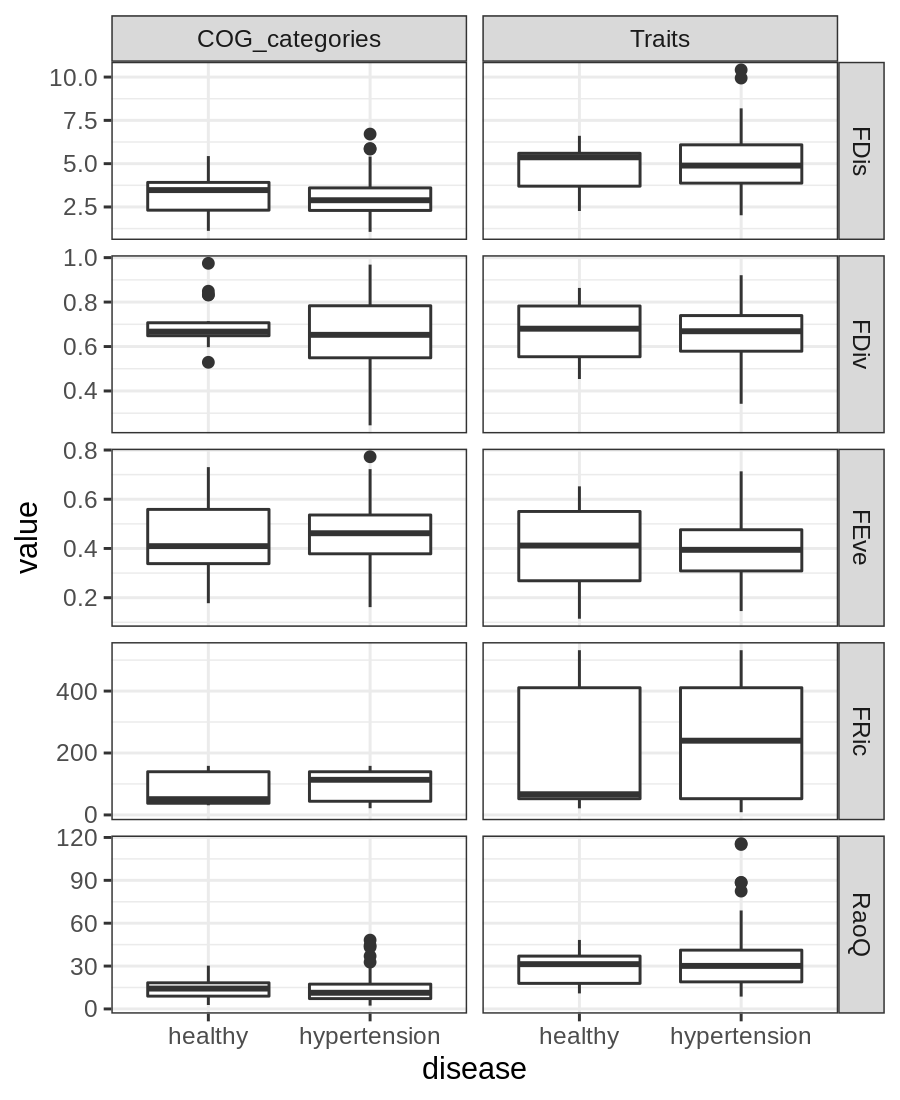

In [119]:
# plotting diversity
p = FD_res %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_grid(measure ~ Func_data, scales='free_y') +
    theme_bw()
p.dims(4.5,5.5)
plot(p)

# sessionInfo

In [120]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] FD_1.0-12         vegan_2.5-7       lattice_0.20-45   permute_0.9-5    
 [5] geometry_0.4.5    ade4_1.7-17       ape_5.5           data.table_1.14.0
 [9] ggplot2_3.3.5     tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5   